## Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Getting Data and make it ready

In [33]:
pd.set_option("display.max_columns" , None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [34]:
df1 = pd.read_csv(r"../Data/train.csv")
df2 = pd.read_csv(r"../Data/val.csv")
df3 = pd.read_csv(r"../Data/test.csv")

In [35]:
newDf = pd.concat([df1,df2 , df3]).reset_index(drop=True)

# Explore Data and know some Information

In [36]:
newDf.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [37]:
newDf.shape

(1458641, 10)

In [38]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458641 entries, 0 to 1458640
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458641 non-null  object 
 1   vendor_id           1458641 non-null  int64  
 2   pickup_datetime     1458641 non-null  object 
 3   passenger_count     1458641 non-null  int64  
 4   pickup_longitude    1458641 non-null  float64
 5   pickup_latitude     1458641 non-null  float64
 6   dropoff_longitude   1458641 non-null  float64
 7   dropoff_latitude    1458641 non-null  float64
 8   store_and_fwd_flag  1458641 non-null  object 
 9   trip_duration       1458641 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB


In [39]:
newDf.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458641e+06,1.458641e+06,1.458641e+06,1.458641e+06,1.458641e+06,1.458641e+06,1.458641e+06
mean,1.534950e+00,1.664531e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594925e+02
std,4.987772e-01,1.314243e+00,7.090188e-02,3.288119e-02,7.064334e-02,3.589055e-02,5.237437e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Checking Null , Duplicated values and deal with it

In [40]:
newDf.duplicated().sum()

np.int64(0)

In [41]:
newDf = newDf.drop_duplicates().reset_index(drop=True)

In [42]:
newDf.duplicated().sum()

np.int64(0)

In [43]:
newDf.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Understanding Data

In [44]:
newDf.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


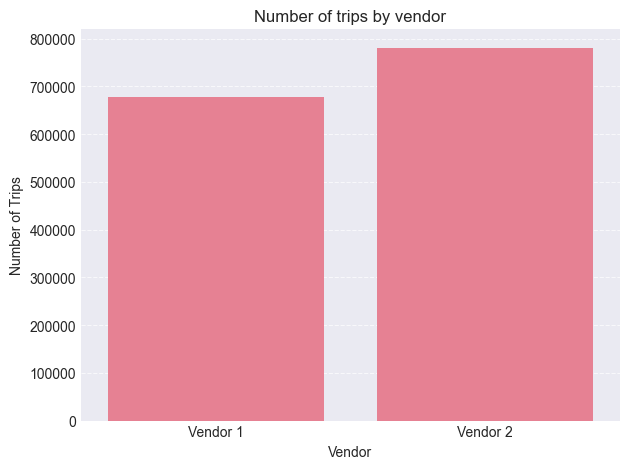

In [45]:
sns.countplot(x = 'vendor_id' , data= newDf)
plt.title('Number of trips by vendor')
plt.xlabel('Vendor')
plt.ylabel('Number of Trips')
plt.xticks([0, 1], labels=['Vendor 1', 'Vendor 2'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

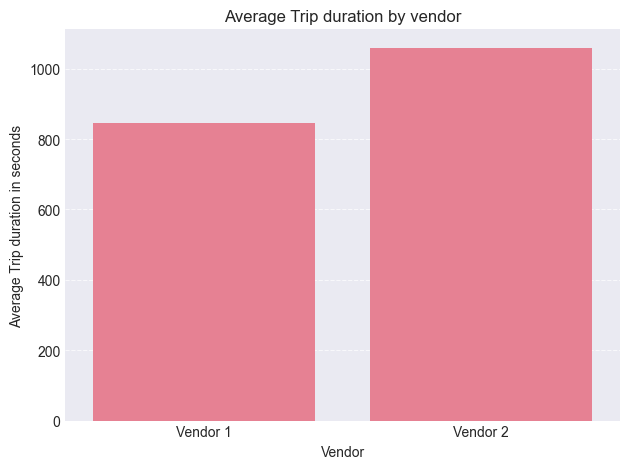

In [46]:
vendor_avg_duration = newDf.groupby("vendor_id")['trip_duration'].mean()

sns.barplot(x = vendor_avg_duration.index , y = vendor_avg_duration.values)
plt.title('Average Trip duration by vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Trip duration in seconds')
plt.xticks([0, 1], labels=['Vendor 1', 'Vendor 2'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
# we can remove 7 , 8 , 9 because it's too much passnegers for taxi
# also for 0 how the trip start and there is no passnegers!
newDf['passenger_count'].value_counts()

passenger_count
1    1033537
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
8          1
9          1
Name: count, dtype: int64

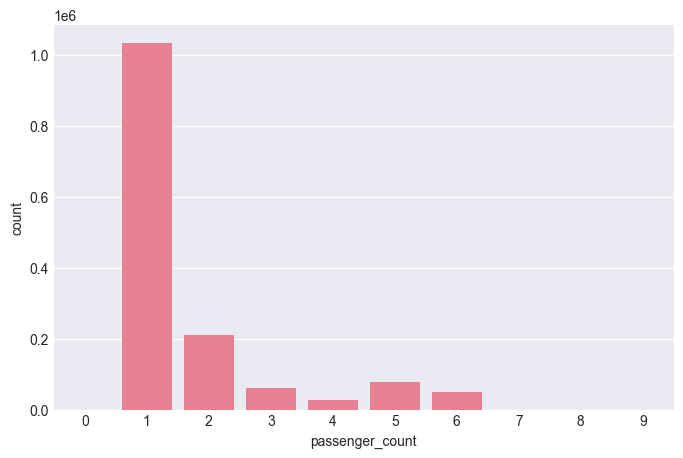

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x = "passenger_count" , data = newDf )
plt.show()


In [49]:
drop_values = [0,7,8,9]

for i in np.arange(0 , len(drop_values)):
    newDf = newDf[newDf["passenger_count"] != drop_values[i]]
    
newDf = newDf.reset_index(drop=True)

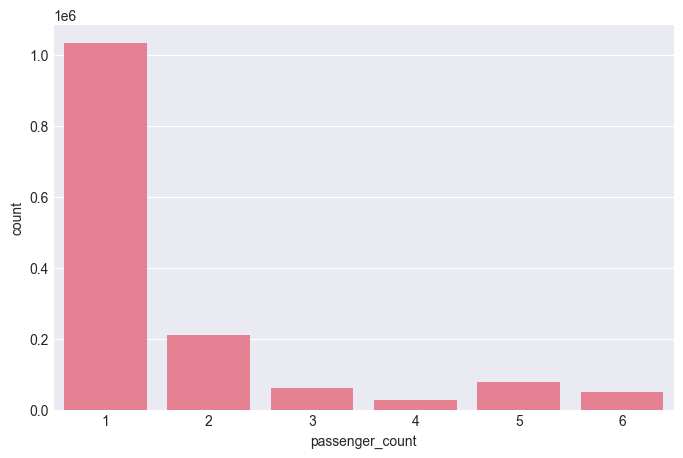

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x = "passenger_count" , data = newDf )
plt.show()

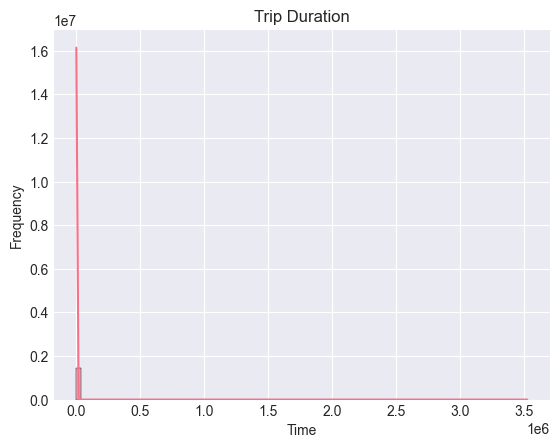

In [51]:
sns.histplot(newDf["trip_duration"] , kde=True , bins=100)
plt.title('Trip Duration')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [52]:
# There is Outliers
print(list(newDf["trip_duration"].sort_values()[:20]))
print(list(newDf["trip_duration"].sort_values(ascending = False)[:20]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3526282, 2227612, 2049578, 1939736, 86392, 86391, 86390, 86387, 86385, 86379, 86378, 86378, 86377, 86377, 86369, 86369, 86369, 86369, 86367, 86367]


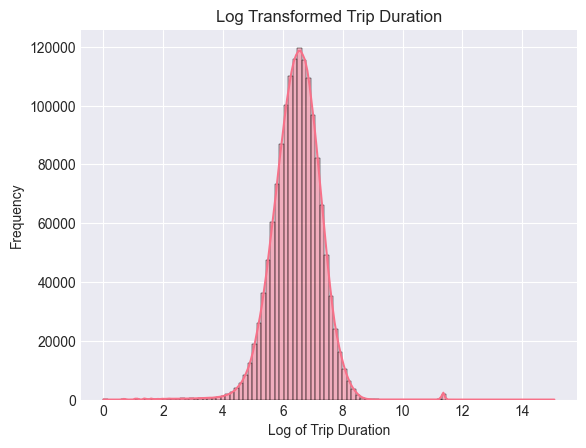

In [53]:
newDf["log_trip_duraion"] =  np.log(newDf["trip_duration"])

sns.histplot(newDf["log_trip_duraion"] , kde=True , bins=100)
plt.title('Log Transformed Trip Duration')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Frequency')
plt.show()

## Drop Outliers

In [54]:
mean = np.mean(newDf["log_trip_duraion"])
std = np.std(newDf["log_trip_duraion"])
newDf = newDf[newDf['log_trip_duraion'] <= mean + 3*std]
newDf = newDf[newDf['log_trip_duraion'] >= mean - 3*std]


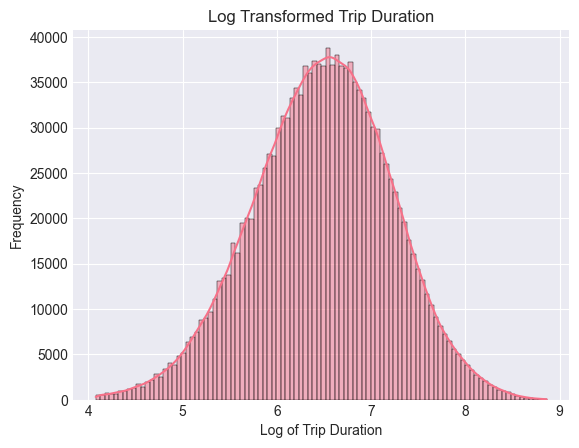

In [55]:
sns.histplot(newDf["log_trip_duraion"] , kde=True , bins=100)
plt.title('Log Transformed Trip Duration')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Frequency')
plt.show()

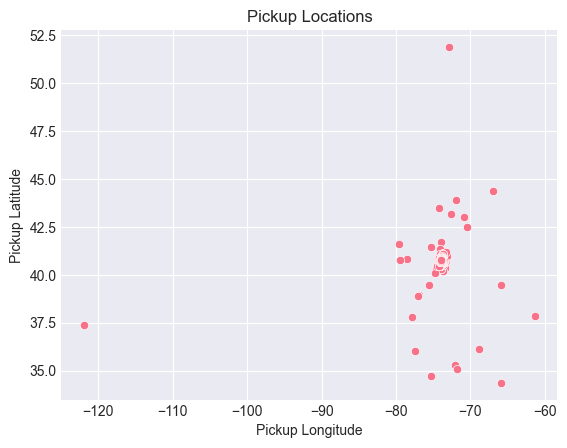

In [56]:
sns.scatterplot(data=newDf , x="pickup_longitude" , y = "pickup_latitude")
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

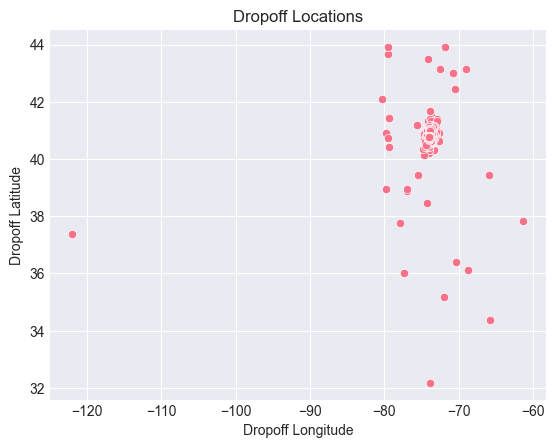

In [57]:
sns.scatterplot(data=newDf , x="dropoff_longitude" , y = "dropoff_latitude")
plt.title('Dropoff Locations')
plt.xlabel('Dropoff Longitude')
plt.ylabel('Dropoff Latitude')
plt.show()

## Determine Specific Area

In [58]:
newDf = newDf[newDf['pickup_longitude'] <= -73.75]
newDf = newDf[newDf['pickup_longitude'] >= -74.03]
newDf = newDf[newDf['pickup_latitude'] <= 40.85]
newDf = newDf[newDf['pickup_latitude'] >= 40.63]

newDf = newDf[newDf['dropoff_longitude'] <= -73.75]
newDf = newDf[newDf['dropoff_longitude'] >= -74.03]
newDf = newDf[newDf['dropoff_latitude'] <= 40.85]
newDf = newDf[newDf['dropoff_latitude'] >= 40.63]

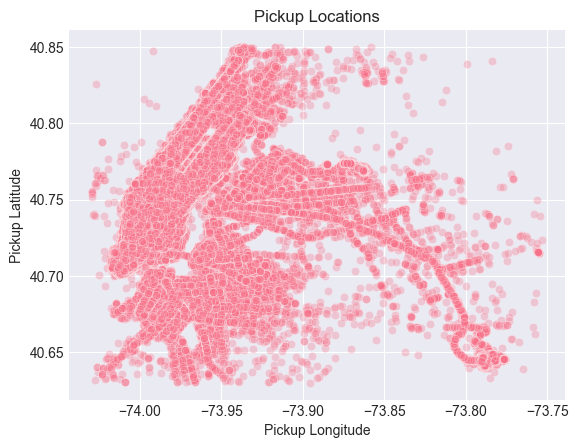

In [59]:
sns.scatterplot(data=newDf , x="pickup_longitude" , y = "pickup_latitude" , alpha=0.3)
plt.title('Pickup Locations')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.show()

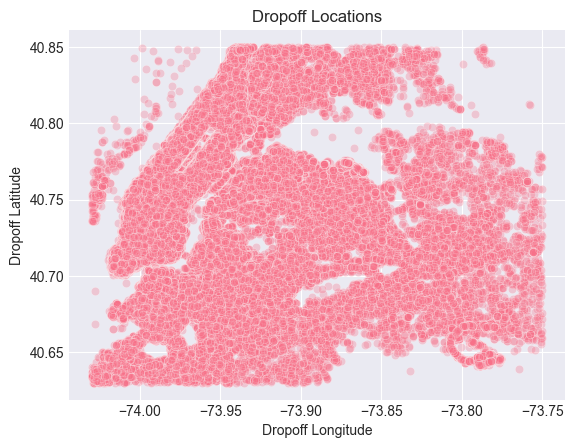

In [60]:
sns.scatterplot(data=newDf , x="dropoff_longitude" , y = "dropoff_latitude" , alpha=0.3)
plt.title('Dropoff Locations')
plt.xlabel('Dropoff Longitude')
plt.ylabel('Dropoff Latitude')
plt.show()

## Feature Engineering

In [61]:
y= newDf["log_trip_duraion"]
newDf = newDf.drop(columns=['log_trip_duraion'] , axis=1)

In [62]:
newDf["trip_duration_hr"] = newDf["trip_duration"] / 3600
newDf['pickup_datetime'] = pd.to_datetime(newDf['pickup_datetime'])
newDf['pickup_date'] = newDf['pickup_datetime'].dt.date
newDf['minute_of_day'] = newDf['pickup_datetime'].dt.minute

In [63]:
newDf = newDf.drop('id' , axis=1)
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hr,pickup_date,minute_of_day
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,0.288889,2016-06-08,36
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,0.229722,2016-04-03,58
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,0.170556,2016-06-05,49
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,0.240833,2016-05-05,18
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,1.379722,2016-05-12,43


In [64]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429067 entries, 0 to 1458575
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1429067 non-null  int64         
 1   pickup_datetime     1429067 non-null  datetime64[ns]
 2   passenger_count     1429067 non-null  int64         
 3   pickup_longitude    1429067 non-null  float64       
 4   pickup_latitude     1429067 non-null  float64       
 5   dropoff_longitude   1429067 non-null  float64       
 6   dropoff_latitude    1429067 non-null  float64       
 7   store_and_fwd_flag  1429067 non-null  object        
 8   trip_duration       1429067 non-null  int64         
 9   trip_duration_hr    1429067 non-null  float64       
 10  pickup_date         1429067 non-null  object        
 11  minute_of_day       1429067 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(3), object(2)
memory usag

In [65]:
newDf['pickup_hour'] = newDf['pickup_datetime'].dt.hour
newDf['pickup_day_name'] = newDf['pickup_datetime'].dt.day_name()
newDf['pickup_day_num'] = newDf['pickup_datetime'].dt.dayofweek

In [66]:
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hr,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,0.288889,2016-06-08,36,7,Wednesday,2
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,0.229722,2016-04-03,58,12,Sunday,6
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,0.170556,2016-06-05,49,2,Sunday,6
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,0.240833,2016-05-05,18,17,Thursday,3
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,1.379722,2016-05-12,43,17,Thursday,3


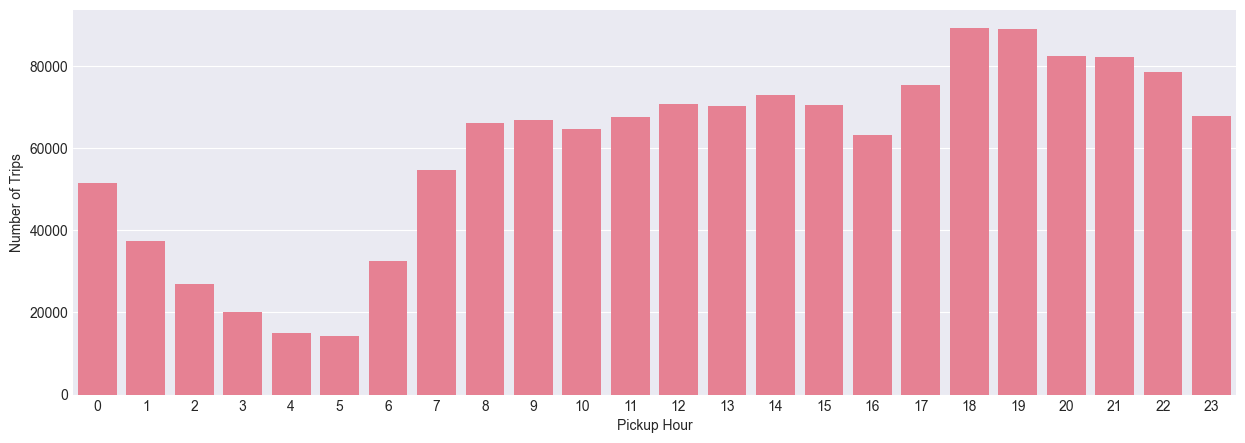

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x = "pickup_hour" , data=newDf)
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.show()

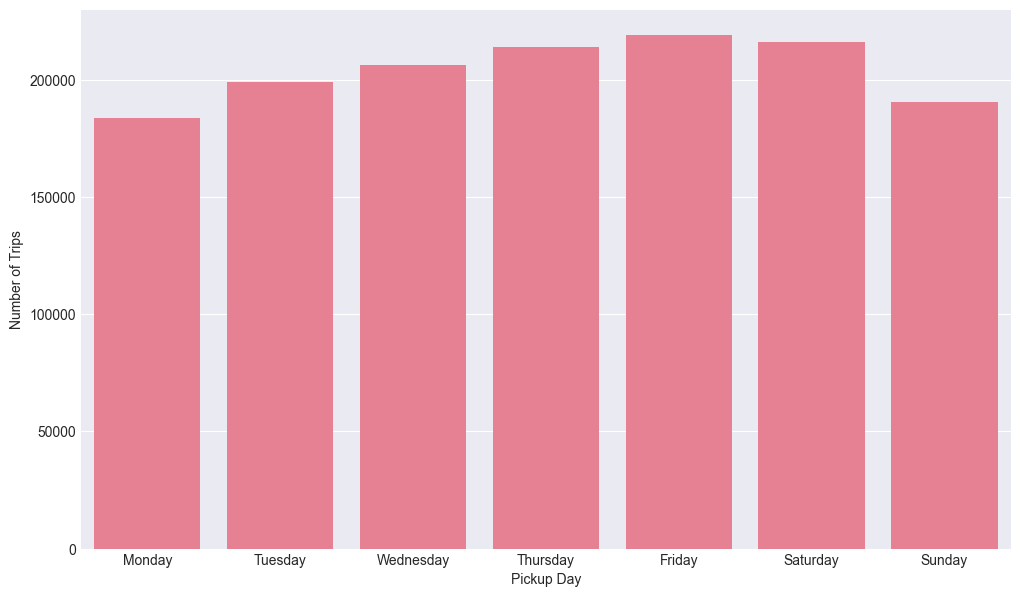

In [68]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday' ,'Saturday' ,'Sunday']

plt.figure(figsize=(12,7))
sns.countplot(x='pickup_day_name' , data=newDf , order=day_order)
plt.xlabel("Pickup Day")
plt.ylabel("Number of Trips")
plt.show()

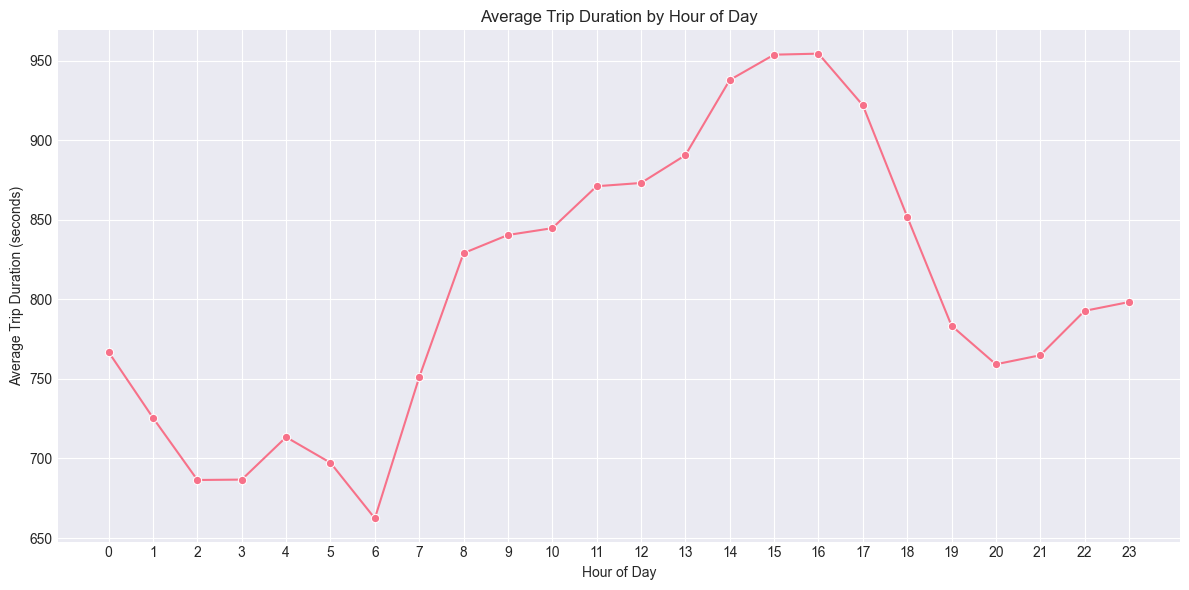

In [69]:
hourly_avg = newDf.groupby('pickup_hour')['trip_duration'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')

plt.xticks(range(0, 24)) 
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

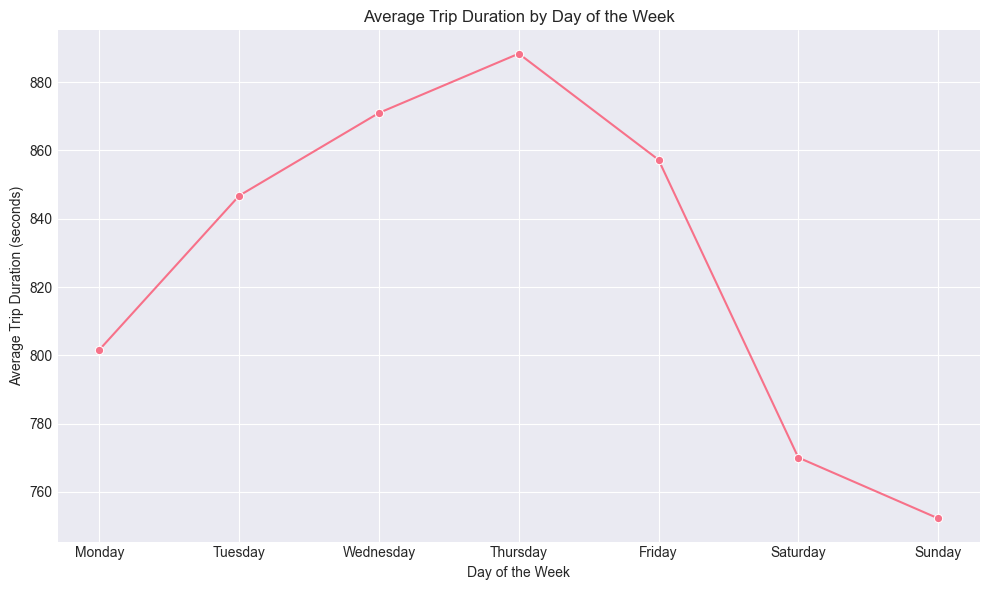

In [70]:
avg_by_day = newDf.groupby('pickup_day_name')['trip_duration'].mean()

avg_by_day = avg_by_day.reindex(day_order)
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_by_day.index, y=avg_by_day.values, marker='o')

plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
newDf['time_of_day'] = pd.cut(newDf['pickup_hour'], 
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'])


In [72]:
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hr,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,0.288889,2016-06-08,36,7,Wednesday,2,Morning
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,0.229722,2016-04-03,58,12,Sunday,6,Morning
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,0.170556,2016-06-05,49,2,Sunday,6,Night
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,0.240833,2016-05-05,18,17,Thursday,3,Afternoon
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,1.379722,2016-05-12,43,17,Thursday,3,Afternoon


In [73]:
# 1. Haversine Distance: Straight-line distance between pickup and dropoff locations
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371    # Average radius of Earth in kilometers
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    distance = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return distance

# 2. Bearing Distance: Directional angle between pickup and dropoff locations 
def bearing_direction(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


def manhattan_distance(lat1, lng1, lat2, lng2):
    a  = np.abs(newDf['dropoff_longitude'] - newDf['pickup_longitude']) 
    b = np.abs(newDf['dropoff_latitude'] - newDf['pickup_latitude'])
    return a + b


In [74]:
newDf['distance_haversine'] = haversine_distance(newDf['pickup_latitude'].values, newDf['pickup_longitude'].values, newDf['dropoff_latitude'].values, newDf['dropoff_longitude'].values)
newDf["direction"] = bearing_direction(newDf["pickup_latitude"].values, newDf["pickup_longitude"].values, newDf["dropoff_latitude"].values, newDf["dropoff_longitude"].values)
newDf["manhattan_distance"] =  manhattan_distance(newDf["pickup_latitude"].values, newDf["pickup_longitude"].values, newDf["dropoff_latitude"].values, newDf["dropoff_longitude"].values)

In [75]:
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hr,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day,distance_haversine,direction,manhattan_distance
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,0.288889,2016-06-08,36,7,Wednesday,2,Morning,2.763050,9.261031,0.029804
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,0.229722,2016-04-03,58,12,Sunday,6,Morning,1.959178,-145.332373,0.027721
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,0.170556,2016-06-05,49,2,Sunday,6,Night,1.404772,70.081271,0.019981
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,0.240833,2016-05-05,18,17,Thursday,3,Afternoon,1.978660,-2.289677,0.018719
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,1.379722,2016-05-12,43,17,Thursday,3,Afternoon,20.837745,-53.020809,0.310196


In [76]:
newDf.drop(["trip_duration","trip_duration_hr"], axis=1, inplace=True)

In [77]:
newDf['Month'] = newDf['pickup_datetime'].dt.month
newDf["Day"] = newDf.pickup_datetime.dt.day
newDf["Week"] = newDf.pickup_datetime.dt.isocalendar().week


In [78]:
newDf['is_rush_hour'] = ((newDf['pickup_hour'] >= 7) & (newDf['pickup_hour'] <= 9)) | \
                     ((newDf['pickup_hour'] >= 17) & (newDf['pickup_hour'] <= 19))


In [79]:
newDf = pd.get_dummies(newDf, columns=['is_rush_hour'])
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day,distance_haversine,direction,manhattan_distance,Month,Day,Week,is_rush_hour_False,is_rush_hour_True
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,2016-06-08,36,7,Wednesday,2,Morning,2.763050,9.261031,0.029804,6,8,23,False,True
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,2016-04-03,58,12,Sunday,6,Morning,1.959178,-145.332373,0.027721,4,3,13,True,False
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,2016-06-05,49,2,Sunday,6,Night,1.404772,70.081271,0.019981,6,5,22,True,False
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,2016-05-05,18,17,Thursday,3,Afternoon,1.978660,-2.289677,0.018719,5,5,18,False,True
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,2016-05-12,43,17,Thursday,3,Afternoon,20.837745,-53.020809,0.310196,5,12,19,False,True


In [80]:
newDf = pd.get_dummies(newDf, columns=['store_and_fwd_flag'])
newDf["is_rush_hour_False"] = newDf['is_rush_hour_False'].astype(np.int64)
newDf["is_rush_hour_True"] = newDf['is_rush_hour_True'].astype(np.int64)
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day,distance_haversine,direction,manhattan_distance,Month,Day,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,2016-06-08,36,7,Wednesday,2,Morning,2.763050,9.261031,0.029804,6,8,23,0,1,True,False
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,2016-04-03,58,12,Sunday,6,Morning,1.959178,-145.332373,0.027721,4,3,13,1,0,True,False
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,2016-06-05,49,2,Sunday,6,Night,1.404772,70.081271,0.019981,6,5,22,1,0,True,False
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,2016-05-05,18,17,Thursday,3,Afternoon,1.978660,-2.289677,0.018719,5,5,18,0,1,True,False
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,2016-05-12,43,17,Thursday,3,Afternoon,20.837745,-53.020809,0.310196,5,12,19,0,1,True,False


In [81]:
newDf['store_and_fwd_flag_N'] =newDf['store_and_fwd_flag_N'].astype(np.int64)
newDf['store_and_fwd_flag_Y'] = newDf['store_and_fwd_flag_Y'].astype(np.int64)
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day,distance_haversine,direction,manhattan_distance,Month,Day,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,2016-06-08,36,7,Wednesday,2,Morning,2.763050,9.261031,0.029804,6,8,23,0,1,1,0
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,2016-04-03,58,12,Sunday,6,Morning,1.959178,-145.332373,0.027721,4,3,13,1,0,1,0
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,2016-06-05,49,2,Sunday,6,Night,1.404772,70.081271,0.019981,6,5,22,1,0,1,0
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,2016-05-05,18,17,Thursday,3,Afternoon,1.978660,-2.289677,0.018719,5,5,18,0,1,1,0
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,2016-05-12,43,17,Thursday,3,Afternoon,20.837745,-53.020809,0.310196,5,12,19,0,1,1,0


In [82]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=newDf['pickup_datetime'].min(), 
                        end=newDf['pickup_datetime'].max())
newDf['is_holiday'] = newDf['pickup_datetime'].dt.date.isin([d.date() for d in holidays]).astype(int)

In [83]:
newDf.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_date,minute_of_day,pickup_hour,pickup_day_name,pickup_day_num,time_of_day,distance_haversine,direction,manhattan_distance,Month,Day,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_holiday
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,2016-06-08,36,7,Wednesday,2,Morning,2.763050,9.261031,0.029804,6,8,23,0,1,1,0,0
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,2016-04-03,58,12,Sunday,6,Morning,1.959178,-145.332373,0.027721,4,3,13,1,0,1,0,0
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,2016-06-05,49,2,Sunday,6,Night,1.404772,70.081271,0.019981,6,5,22,1,0,1,0,0
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,2016-05-05,18,17,Thursday,3,Afternoon,1.978660,-2.289677,0.018719,5,5,18,0,1,1,0,0
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,2016-05-12,43,17,Thursday,3,Afternoon,20.837745,-53.020809,0.310196,5,12,19,0,1,1,0,0


In [84]:
newDf = newDf.drop(["pickup_datetime",'pickup_date' , 'pickup_day_num'], axis=1)

In [85]:
newDf.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,minute_of_day,pickup_hour,pickup_day_name,time_of_day,distance_haversine,direction,manhattan_distance,Month,Day,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_holiday
0,2,1,-73.985611,40.735943,-73.980331,40.760468,36,7,Wednesday,Morning,2.763050,9.261031,0.029804,6,8,23,0,1,1,0,0
1,2,1,-73.978394,40.764351,-73.991623,40.749859,58,12,Sunday,Morning,1.959178,-145.332373,0.027721,4,3,13,1,0,1,0,0
2,2,5,-73.989059,40.744389,-73.973381,40.748692,49,2,Sunday,Night,1.404772,70.081271,0.019981,6,5,22,1,0,1,0,0
3,2,2,-73.990326,40.731136,-73.991264,40.748917,18,17,Thursday,Afternoon,1.978660,-2.289677,0.018719,5,5,18,0,1,1,0,0
4,1,4,-73.789497,40.646675,-73.987137,40.759232,43,17,Thursday,Afternoon,20.837745,-53.020809,0.310196,5,12,19,0,1,1,0,0


In [86]:
newDf = pd.get_dummies(newDf, columns=['pickup_day_name', 'time_of_day'] , dtype= int)
newDf = pd.get_dummies(newDf, columns=["Month" ,'Day' ,'pickup_hour'] , dtype= int)

In [87]:
newDf.head()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,minute_of_day,distance_haversine,direction,manhattan_distance,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_holiday,pickup_day_name_Friday,pickup_day_name_Monday,pickup_day_name_Saturday,pickup_day_name_Sunday,pickup_day_name_Thursday,pickup_day_name_Tuesday,pickup_day_name_Wednesday,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,2,1,-73.985611,40.735943,-73.980331,40.760468,36,2.763050,9.261031,0.029804,23,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,-73.978394,40.764351,-73.991623,40.749859,58,1.959178,-145.332373,0.027721,13,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,5,-73.989059,40.744389,-73.973381,40.748692,49,1.404772,70.081271,0.019981,22,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,-73.990326,40.731136,-73.991264,40.748917,18,1.978660,-2.289677,0.018719,18,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,-73.789497,40.646675,-73.987137,40.759232,43,20.837745,-53.020809,0.310196,19,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [88]:
newDf.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'minute_of_day',
       'distance_haversine', 'direction', 'manhattan_distance', 'Week',
       'is_rush_hour_False', 'is_rush_hour_True', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'is_holiday', 'pickup_day_name_Friday',
       'pickup_day_name_Monday', 'pickup_day_name_Saturday',
       'pickup_day_name_Sunday', 'pickup_day_name_Thursday',
       'pickup_day_name_Tuesday', 'pickup_day_name_Wednesday',
       'time_of_day_Night', 'time_of_day_Morning', 'time_of_day_Afternoon',
       'time_of_day_Evening', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5',
       'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12',
       'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19',
       'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26',
    

In [89]:
X_train, X_temp, y_train, y_temp = train_test_split(
    newDf, y, 
    test_size=0.25, 
    random_state=42, 
    shuffle=True
)

X_val, X_test , y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50,  
    random_state=42, 
    shuffle=True
)

In [90]:
X_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,minute_of_day,distance_haversine,direction,manhattan_distance,Week,is_rush_hour_False,is_rush_hour_True,store_and_fwd_flag_N,store_and_fwd_flag_Y,is_holiday,pickup_day_name_Friday,pickup_day_name_Monday,pickup_day_name_Saturday,pickup_day_name_Sunday,pickup_day_name_Thursday,pickup_day_name_Tuesday,pickup_day_name_Wednesday,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
521727,1,1,-73.987823,40.754787,-73.974068,40.754772,22,1.158670,90.079411,0.013771,24,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
366906,2,1,-73.980988,40.750450,-73.967842,40.766899,58,2.138054,31.183928,0.029594,24,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
172867,1,1,-73.969421,40.761211,-73.952423,40.792278,9,3.739265,22.500432,0.048065,24,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1392913,2,1,-73.981941,40.773079,-73.950569,40.773079,9,2.641784,89.989756,0.031372,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
190860,1,1,-73.987823,40.768860,-73.994057,40.753963,11,1.737606,-162.412500,0.021130,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modeling

In [91]:
model = Ridge(alpha=.05)
model.fit(X_train, y_train)

Ridge(alpha=0.05)

In [92]:

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R^2: {r2_train:.4f}")
print(mean_squared_error(y_train, y_pred_train))

Training R^2: 0.5285
0.2471856064575563


In [93]:
y_pred_valid = model.predict(X_val)
r2_valid = r2_score(y_val, y_pred_valid)
print(f"Validation R^2: {r2_valid:.4f}")
print(mean_squared_error(y_val, y_pred_valid))

Validation R^2: 0.5266
0.24857721205707403


In [94]:
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Validation R^2: {r2_test:.4f}")
print(mean_squared_error(y_test, y_pred_test))

Validation R^2: 0.5271
0.24917002955144466


In [95]:
def tuning_RFR(X_train , y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],             
        'max_depth': [5,10, 15],                 
        "min_samples_split": [5,10,15], 
        "min_samples_leaf": [2,5,10],       
    }

    RFR = RandomForestRegressor(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=RFR,
        param_distributions=param_grid,
        n_iter=50,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train[:100000], y_train[:100000])

    print("Best Parameters:", random_search.best_params_)
    print("Best R² Score:", random_search.best_score_)


In [110]:
RFR = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,              
    min_samples_split=10,       
    min_samples_leaf=5,
    n_jobs=-1,                  
    random_state=42
)
RFR.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_jobs=-1, random_state=42)

In [111]:
y_pred_train = RFR.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R²: {r2_train:.4f}")

Training R²: 0.8685


In [112]:
y_pred_val = RFR.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Validation R²: {r2_val:.4f}")

Validation R²: 0.7970


In [113]:
y_pred_test = RFR.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Testing R²: {r2_test:.4f}")

Testing R²: 0.7969


In [100]:
def tuning_DTR(X_train , y_train):
    param_dist = {
        'max_depth': [5, 10, 17, 20],           
        'min_samples_split': [5, 10, 20],            
        'min_samples_leaf': [2, 4, 10],             
        'criterion': ['squared_error', 'friedman_mse']
    }

    dtr = DecisionTreeRegressor(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=dtr,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("Best Parameters:", random_search.best_params_)
    print("Best R² Score:", random_search.best_score_)


In [101]:
m2 = DecisionTreeRegressor(max_depth=17,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42,
    criterion = 'squared_error')
m2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [102]:
y_pred_train = m2.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R²: {r2_train:.4f}")

Training R²: 0.8066


In [103]:
y_pred_val = m2.predict(X_val)
r2_train = r2_score(y_val, y_pred_val)
print(f"Validation R²: {r2_train:.4f}")

Validation R²: 0.7512


In [104]:
y_pred_test = m2.predict(X_test)
r2_train = r2_score(y_test, y_pred_test)
print(f"Testing R²: {r2_train:.4f}")

Testing R²: 0.7509


In [105]:
def tuning_XGB(X_train , y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],             
        'max_depth': [5,10, 15],                   
        'reg_alpha': [0.01, 0.02, .05],                   
        'reg_lambda': [1, 2, 3],                     
    }


    XGB = XGBRegressor(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=XGB,
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)

    print("Best Parameters:", random_search.best_params_)
    print("Best R² Score:", random_search.best_score_)


In [106]:
m3 = XGBRegressor(max_depth = 10 , n_estimators = 100 ,reg_alpha = .02 , reg_lambda = 1 , n_jobs=-1)
m3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [107]:
y_pred_train = m3.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training R²: {r2_train:.4f}")

Training R²: 0.8662


In [108]:
y_pred_val = m3.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)
print(f"Validation R²: {r2_val:.4f}")

Validation R²: 0.8197


In [109]:
y_pred_test = m3.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Testing R²: {r2_test:.4f}")

Testing R²: 0.8203


# **Ending** 😁